In [36]:
if(!require("pacman")) install.packages("pacman")
pacman::p_load(tidyverse, patchwork, scales, ggsci)

In [37]:
power_figure <- read_csv("power_figure.csv", show_col_types = FALSE)
hwa_figure <- read_csv(
  "hwa_figure.csv", 
  show_col_types = FALSE
) |> 
  mutate(
    letter  =case_when(
        letter %in% c("D", "G", "I", "Q", "R") ~ "Other",
        TRUE ~ as.character(letter)
    )
  ) 

New names:
• `` -> `...1`
New names:
• `` -> `...1`


In [38]:
all_letters <- c("M", "S", "T", "Other")

In [39]:
hwa_figure <- hwa_figure |>
  dplyr::mutate(letter = factor(letter, levels = all_letters))
power_figure <- power_figure |> 
  dplyr::mutate(letter = factor(letter, levels = all_letters))

In [40]:
# Create a named color palette (adjust to your preferred color scheme)
letter_colors <- ggsci::pal_bmj()(length(all_letters))
names(letter_colors) <- all_letters

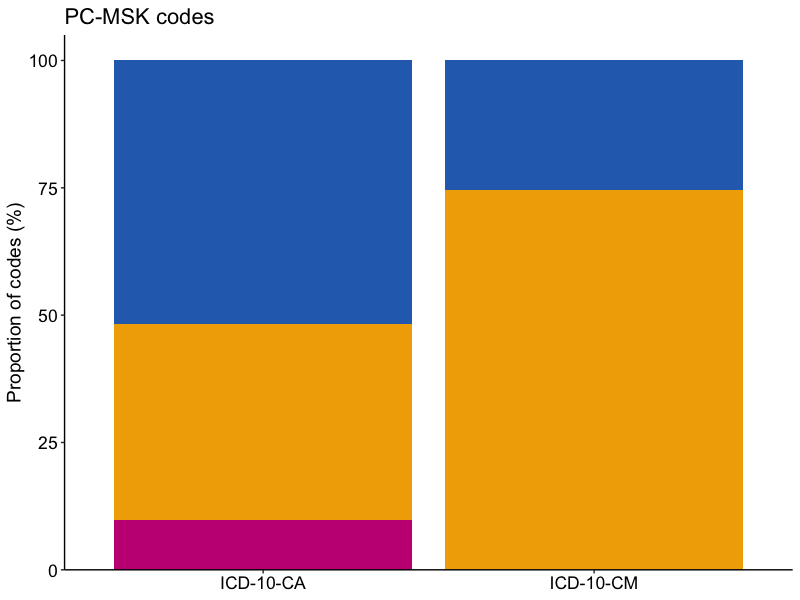

In [58]:
power_stacked <- ggplot(power_figure, aes(fill=letter, y=n, x=code)) + 
    geom_bar(position="stack", stat="identity", show.legend = FALSE)+
    scale_fill_manual(values = letter_colors) +
    theme_classic()+
    scale_y_continuous(
      expand = expansion(mult = c(0, 0.05))
    )+
    labs(
        y = "Proportion of codes (%)",
        fill = "ICD-10 Letter",
        title = "PC-MSK codes"
    )+
    theme(
        legend.text = element_text(size = rel(1.5)),
        legend.title = element_text(size = rel(1.5)),
        axis.text.x = element_text(size = rel(1.5), color = "black"),
        axis.title.x = element_blank(),
        axis.text.y = element_text(size = rel(1.5), color = "black"),
        axis.title.y = element_text(size = rel(1.3)),
        plot.title = element_text(size = rel(1.5))
    )

ggsave("stacked.svg", power_stacked, device = "svg", width = 10, height=7, dpi=1200)
plot(power_stacked)

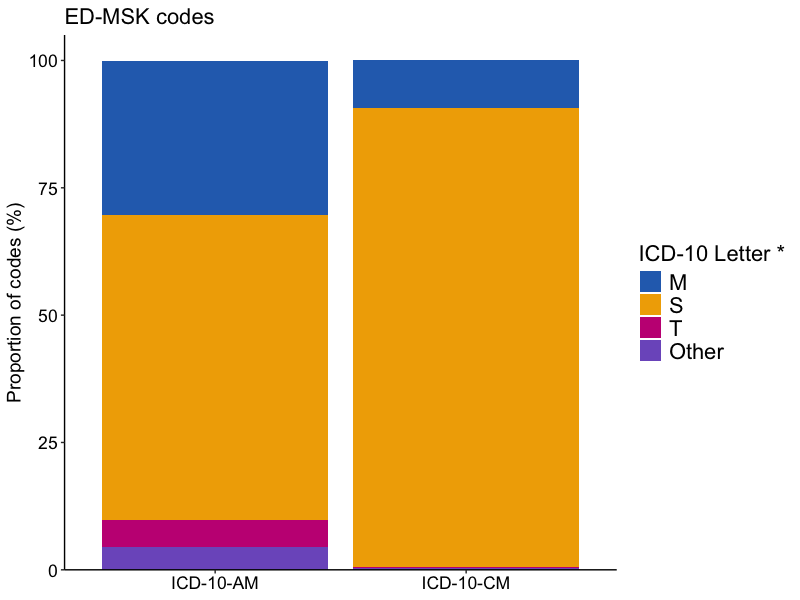

In [59]:
hwa_stacked <- hwa_figure |> 
    ggplot( aes(fill=letter, y=n, x=code)) + 
    geom_bar(position="stack", stat="identity")+
    scale_fill_manual(values = letter_colors) +
    theme_classic()+
    scale_y_continuous(
      expand = expansion(mult = c(0, 0.05))
    )+
    labs(
        x = "",
        y = "Proportion of codes (%)",
        fill = "ICD-10 Letter *",
        title = "ED-MSK codes"
    )+
    theme(
        legend.text = element_text(size = rel(1.5)),
        legend.title = element_text(size = rel(1.5)),
        axis.text.x = element_text(size = rel(1.5), color = "black"),
        axis.title.x = element_blank(),
        axis.text.y = element_text(size = rel(1.5), color = "black"),
        axis.title.y = element_text(size = rel(1.3)),
        plot.title = element_text(size = rel(1.5))
    )

ggsave("stacked.svg", hwa_stacked, device = "svg", width = 10, height=7, dpi=1200)
plot(hwa_stacked)

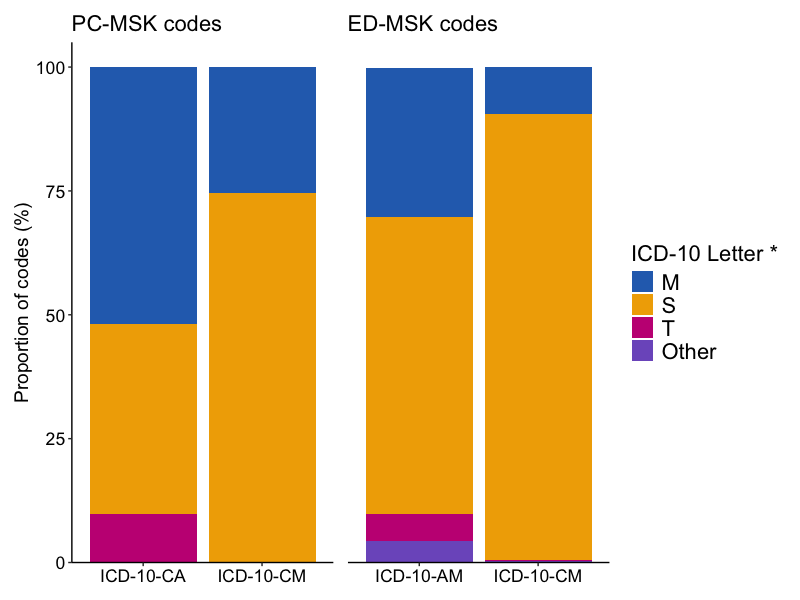

In [60]:
code_plot <- power_stacked + hwa_stacked+plot_layout(ncol = 2, axes = "collect") 
ggsave("code_plot.svg", code_plot, device = "svg", width = 10, height=7, dpi=1200)
ggsave("code_plot.png", code_plot, device = "png", width = 10, height=7, dpi=1200)
plot(code_plot)